In [2]:
# allow imports from the main source directory
import sys
sys.path.append('..')
import logging
logging.basicConfig(level=logging.WARNING)
# logging.basicConfig(level=logging.INFO)
#logging.getLogger().setLevel(logging.INFO)

import pathlib
import pickle
import bz2 as compress
import matplotlib.pyplot as plt
import matplotlib.lines as lines

from Environment import Environment, EpidemicSpreadEnvironment, DissipationModelEnvironment, PrecalculatedEnvironment
from InformationModel import StoredObservationIM, GaussianProcessScalarFieldIM, DiskEstimateScalarFieldIM, im_score, im_score_weighted
from Robot import Robot
from Policy import GoToLocationPolicy, FollowPathPolicy, RandomWaypointPolicy, \
    AbstractWaypointPolicy, InformationGreedyPolicy
from PathGenerators import generate_lawnmower
from WaterberryFarm import create_wbfe, WaterberryFarm, MiniberryFarm, WaterberryFarmInformationModel, waterberry_score
from WbfExperiment import menu



INFO:root:loading the geometry and environment from saved data
INFO:root:loading done
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:PrecalculatedEnvironment at timestamp 6
INFO:root:Loading from bz2 /home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Miniberry-10/precalc_tylcv/env_value_00006.bz2
INFO:root:Loading from bz2 /home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Miniberry-10/precalc_tylcv/env_value_00006.bz2 done
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:PrecalculatedEnvironment at timestamp 6
INFO:root:Loading from bz2 /home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Miniberry-10/precalc_ccr/env_value_00006.bz2
INFO:root:Loading from bz2 /home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Miniberry-10/precalc_ccr/env_value_00006.bz2 done
INFO:root:Environment.proceed - calling the inner_proceed
INFO

Choose the policy
	1. Lawnmower - full coverage by day
	2. Lawnmower - restart
	3. Random waypoint


INFO:root:Saving results to: /home/lboloni/Documents/Hackingwork/__Temporary/2022-01-15-MREM_data/Miniberry-10/res-pol_1


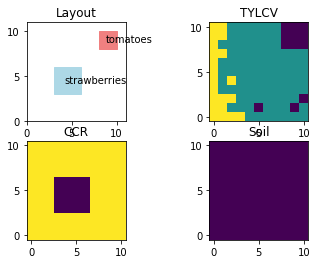

In [7]:
results = menu({"geometry": 1, "action": 4, "scenario": 1, "visualize": 0, "time_start_environment": 6})

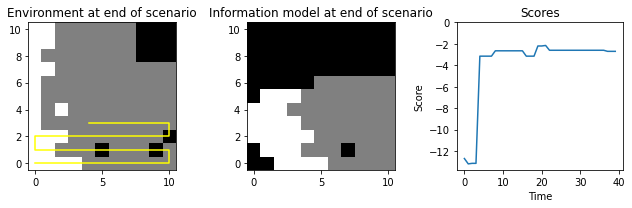

In [8]:
#print(results)
wbfe = results["wbfe"]
wbfim = results["wbfim"]
fig, ((ax_env_tylcv, ax_im_tylcv, ax_scores)) = plt.subplots(1, 3, figsize=(9,3))
# visualize the environment
image_env_tylcv = ax_env_tylcv.imshow(wbfe.tylcv.value.T, vmin=0, vmax=1, origin="lower", cmap="gray")
ax_env_tylcv.set_title("Environment at end of scenario")
# visualize the information model
image_im_tylcv = ax_im_tylcv.imshow(wbfim.im_tylcv.value.T, vmin=0, vmax=1, origin="lower", cmap="gray")
ax_im_tylcv.set_title("Information model at end of scenario")
# visualize the observations, which gives us the path of the robot
obsx = []
obsy = []
for obs in results["observations"]:
    obsx.append(obs[StoredObservationIM.X])
    obsy.append(obs[StoredObservationIM.Y])
    old_obs = obs
ax_env_tylcv.add_line(lines.Line2D(obsx, obsy, color="yellow"))
ax_scores.plot(results["scores"])
ax_scores.set_ylim(top=0)
ax_scores.set_xlabel("Time")
ax_scores.set_ylabel("Score")
ax_scores.set_title("Scores")
fig.tight_layout()
plt.savefig(pathlib.Path(results["savedir"], "Benchmark.pdf"))


In [6]:
results.keys()

dict_keys(['typename', 'time_start_environment', 'wbf', 'wbfe', 'scenario', 'days', 'values', 'robot', 'velocity', 'timespan', 'policy', 'oneshot', 'wbfim', 'score', 'scores', 'observations', 'positions'])

In [5]:
print(results["choices"])

{'geometry': 1, 'action': 4, 'scenario': 1, 'visualize': 0, 'time_start_environment': 6, 'policy': 1}


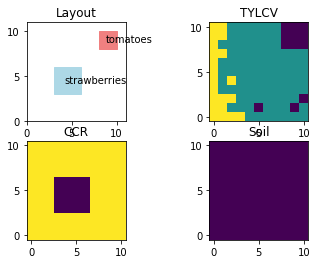

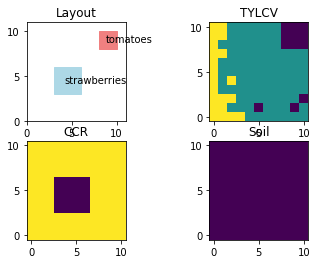

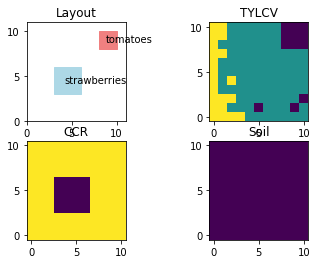

In [17]:
p = pathlib.Path(results["savedir"])
allresults = []
for a in p.iterdir():
    if a.name.startswith("res-"):
        with compress.open(a, "rb") as f:
            results = pickle.load(f)
            allresults.append(results)

In [16]:
allresults

[{'choices': {'geometry': 1,
   'action': 4,
   'scenario': 1,
   'visualize': 0,
   'time_start_environment': 6,
   'policy': 2},
  'typename': 'Miniberry-10',
  'time_start_environment': 6,
  'wbf': <WaterberryFarm.MiniberryFarm at 0x7f1930bd8a90>,
  'wbfe': <WaterberryFarm.WaterberryFarmEnvironment at 0x7f1930b47a00>,
  'savedir': PosixPath('/home/lboloni/Documents/HackingWork/__Temporary/2022-01-15-MREM_data/Miniberry-10'),
  'scenario': 1,
  'days': 1,
  'values': 'single',
  'robot': <Robot.Robot at 0x7f19309a8400>,
  'velocity': 1,
  'timespan': 40.0,
  'policy': 'lawnmower-restart',
  'oneshot': False,
  'wbfim': <WaterberryFarm.WaterberryFarmInformationModel at 0x7f19309b42e0>,
  'score': -1.7000000000000002,
  'scores': [-12.7,
   -13.2,
   -13.15,
   -13.15,
   -3.15,
   -3.15,
   -3.15,
   -3.15,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.6500000000000004,
   -2.650000

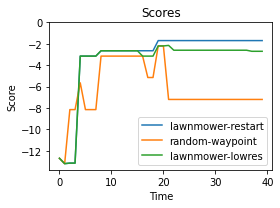

In [27]:
fig, ax_scores = plt.subplots(1, figsize=(4,3))
for results in allresults:
    ax_scores.plot(results["scores"], label = results["policy"])
ax_scores.set_ylim(top=0)
ax_scores.set_xlabel("Time")
ax_scores.set_ylabel("Score")
ax_scores.set_title("Scores")
ax_scores.legend()
fig.tight_layout()


In [21]:
results

{'choices': {'geometry': 1,
  'action': 4,
  'scenario': 1,
  'visualize': 0,
  'time_start_environment': 6,
  'policy': 1},
 'typename': 'Miniberry-10',
 'time_start_environment': 6,
 'wbf': <WaterberryFarm.MiniberryFarm at 0x7f1930f772e0>,
 'wbfe': <WaterberryFarm.WaterberryFarmEnvironment at 0x7f193078f340>,
 'savedir': PosixPath('/home/lboloni/Documents/HackingWork/__Temporary/2022-01-15-MREM_data/Miniberry-10'),
 'scenario': 1,
 'days': 1,
 'values': 'single',
 'robot': <Robot.Robot at 0x7f1930610b50>,
 'velocity': 1,
 'timespan': 40.0,
 'policy': 'lawnmower-lowres',
 'oneshot': False,
 'wbfim': <WaterberryFarm.WaterberryFarmInformationModel at 0x7f1930619a60>,
 'score': -2.7,
 'scores': [-12.7,
  -13.2,
  -13.15,
  -13.15,
  -3.15,
  -3.15,
  -3.15,
  -3.15,
  -2.6500000000000004,
  -2.6500000000000004,
  -2.6500000000000004,
  -2.6500000000000004,
  -2.6500000000000004,
  -2.6500000000000004,
  -2.6500000000000004,
  -2.6500000000000004,
  -3.15,
  -3.15,
  -3.15,
  -2.2,
  -2.2